# EDA Case Study

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from seaborn import countplot, axes_style
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300
from scipy import stats
import re
from matplotlib.pyplot import figure, show

In [2]:
#Load the given csv file as dataframe and check the number of columns and rows in the dataframe obtained
app_data = pd.read_csv('loan/loan.csv')
print(app_data.shape)

(39717, 111)


In [3]:
#Understanding the dataframe app_data
app_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Further insights on the dataframe app_data to understand how the data is spread 
app_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#To check the datatypes of the columns in dataframe app_data
app_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [6]:
# To check if the dataframe 'app_data' has any null values in columns
app_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# To identify the percentage of the null(NA) values in each column in the dataframe 'app_data'.
(round(app_data.isnull().sum()/len(app_data.index), 2)*100).sort_values(ascending=True)

id                                  0.0
pub_rec                             0.0
revol_bal                           0.0
revol_util                          0.0
total_acc                           0.0
initial_list_status                 0.0
out_prncp                           0.0
out_prncp_inv                       0.0
total_pymnt                         0.0
total_pymnt_inv                     0.0
total_rec_int                       0.0
total_rec_late_fee                  0.0
recoveries                          0.0
collection_recovery_fee             0.0
last_pymnt_d                        0.0
last_pymnt_amnt                     0.0
last_credit_pull_d                  0.0
collections_12_mths_ex_med          0.0
policy_code                         0.0
application_type                    0.0
tax_liens                           0.0
acc_now_delinq                      0.0
chargeoff_within_12_mths            0.0
delinq_amnt                         0.0
open_acc                            0.0


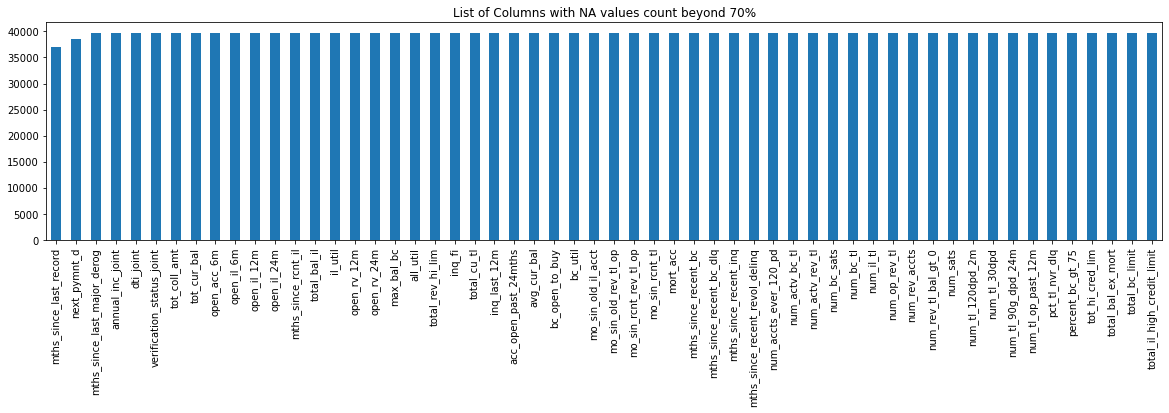

In [8]:
# Identify the coulmns that has null values beyond 70%
columns_NA = app_data.isnull().sum()
columns_NA = columns_NA[columns_NA.values >(0.7*len(app_data))]
plt.figure(figsize=(20,4))
columns_NA.plot(kind='bar')
plt.title('List of Columns with NA values count beyond 70%')
plt.show()

In [9]:
# Dropping the columns having the null or NA values beyond 70% in the dataframe 'app_data'
Drop_NA_Cols = app_data.columns[100*(app_data.isnull().sum()/len(app_data.index)) > 70]
app_data2 = app_data.drop(Drop_NA_Cols, axis=1)
app_data2.shape

(39717, 55)

In [10]:
# Below is the Percentage of missing values in the new data frame 'app_data2' after removing the columns with high missing values
(round(app_data2.isnull().sum()/len(app_data2.index), 2)*100).sort_values(ascending=True)

id                             0.0
pub_rec                        0.0
revol_bal                      0.0
revol_util                     0.0
total_acc                      0.0
initial_list_status            0.0
out_prncp                      0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
total_rec_int                  0.0
total_rec_late_fee             0.0
recoveries                     0.0
collection_recovery_fee        0.0
last_pymnt_d                   0.0
last_pymnt_amnt                0.0
last_credit_pull_d             0.0
collections_12_mths_ex_med     0.0
policy_code                    0.0
application_type               0.0
acc_now_delinq                 0.0
chargeoff_within_12_mths       0.0
delinq_amnt                    0.0
open_acc                       0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
annual_inc                     0.0
member_id           

In [11]:
app_data2[['pub_rec_bankruptcies','emp_length','emp_title', 'desc', 'mths_since_last_delinq']].dtypes

pub_rec_bankruptcies      float64
emp_length                 object
emp_title                  object
desc                       object
mths_since_last_delinq    float64
dtype: object

As we can see the columns which are having the missing values are of either float64 or object data types. Now we can proceed to figure out if there are any outlier in case of float64 type features and then decide which statistical imputation is needed.

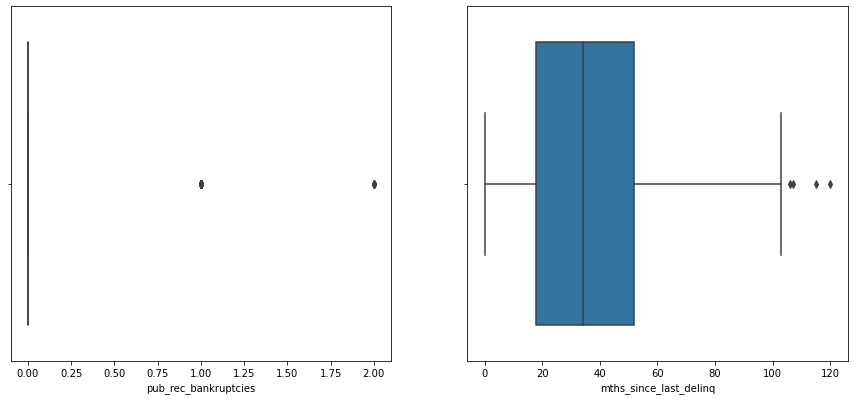

In [12]:
# Graphical way to check if there are any outliers to the mentioned quantitiative column
plt.figure(figsize=(15,30))
features = ['pub_rec_bankruptcies','mths_since_last_delinq']
for i in enumerate(features):
    ax = plt.subplot(4,2, i[0]+1)
    sns.boxplot(i[1], data = app_data2)

In [13]:
app_data2['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
app_data2['mths_since_last_delinq'].value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
19.0     238
38.0     237
20.0     233
18.0     231
22.0     231
31.0     229
35.0     227
32.0     226
39.0     224
25.0     223
45.0     222
26.0     217
37.0     217
21.0     216
16.0     214
17.0     214
27.0     212
36.0     210
42.0     208
10.0     208
29.0     207
47.0     206
34.0     201
43.0     201
44.0     200
14.0     198
40.0     197
46.0     197
41.0     197
12.0     195
48.0     194
28.0     193
6.0      192
33.0     188
9.0      182
7.0      176
13.0     171
8.0      168
11.0     166
4.0      153
49.0     152
5.0      151
58.0     148
3.0      145
59.0     143
53.0     143
52.0     137
56.0     134
50.0     131
73.0     131
55.0     129
68.0     128
63.0     127
60.0     126
57.0     125
72.0     124
71.0     122
70.0     119
54.0     115
74.0     114
67.0     113
62.0     113
75.0     112
76.0     112
61.0     110
69.0     108
51.0     107
79.0     103
66.0     101
2.0      101
78.0      99
64.0      97

- pub_rec_bankruptcies has only 3 possible values, so we will use statistical mode for the missing data treatement
- mths_since_last_delinq has multiple values and varaince of the data is also good enough, so we can impute the missing values in this column with statiscal median since there are outlier in this feature

## Missing Value Treatement

In [15]:
#Median imputation for the quantitative feilds with outliers
app_data2.mths_since_last_delinq.fillna(app_data2.mths_since_last_delinq.median(), inplace=True)

In [16]:
#Changing the data type of the feature as its observed to be categorical variable but read as a Float type
app_data2.pub_rec_bankruptcies = app_data2.pub_rec_bankruptcies.astype(np.object)

#Mode imputation for the categorical feilds with the Zero as it is the mode for the given column
app_data2.pub_rec_bankruptcies.fillna(0,inplace=True)

In [17]:
app_data2['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '1 year'),
  Text(3, 0, '3 years'),
  Text(4, 0, '8 years'),
  Text(5, 0, '9 years'),
  Text(6, 0, '4 years'),
  Text(7, 0, '5 years'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

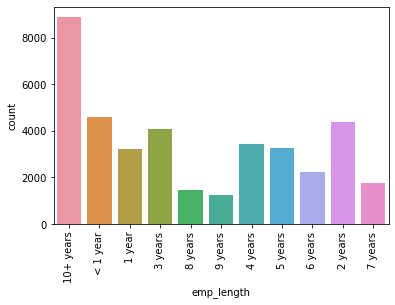

In [18]:
#app_data2['emp_length'].value_counts()
#Graphical way to find the most occuring type of the occupation in the data set. This can also be considered as mode which
#is also verified in the next cell
sns.countplot(x = 'emp_length',data = app_data2)
plt.xticks(rotation = 90)

In [19]:
len(app_data2['emp_title'].unique())

28821

As we can see there are total of 28,821 emp_title in the dataset and the frequency of the emp_title so it becomes problematic while replacing the null values with the mode as it would result in inducing of unintentional bias. so dropping the column 

In [20]:
app_data2['desc'].value_counts()

As we can see that the 'desc' column is all text that is submitted by the loan applicant, and it will be not be much useful without doing NLP on the same in the EDA. so we are dropping this column in this EDA Exercise as of now as the NLP is out of scope for this exercise

In [21]:
# Dropping the columns that are not required for the analysis
app_data2.drop(['desc','emp_title'], axis=1, inplace=True)

(array([0, 1, 2]),
 [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off'), Text(2, 0, 'Current')])

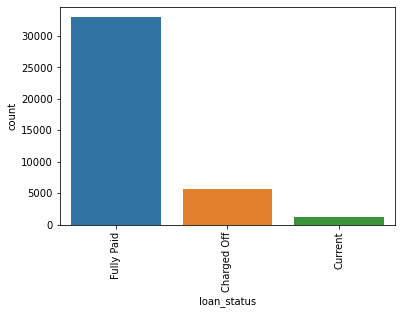

In [22]:
#app_data2['loan_status'].value_counts()
#Graphical way to find the most occuring type of the occupation in the data set. This can also be considered as mode which
#is also verified in the next cell
sns.countplot(x = 'loan_status',data = app_data2)
plt.xticks(rotation = 90)

In [23]:
#Creating a subset of the dataset app_data2 with only the charged off records to validate the assumption of the made if being same in the Charged off subset too
app_data3= app_data2[app_data2['loan_status']== "Charged Off"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '4 years'),
  Text(2, 0, '3 years'),
  Text(3, 0, '10+ years'),
  Text(4, 0, '1 year'),
  Text(5, 0, '9 years'),
  Text(6, 0, '2 years'),
  Text(7, 0, '8 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '5 years'),
  Text(10, 0, '6 years')])

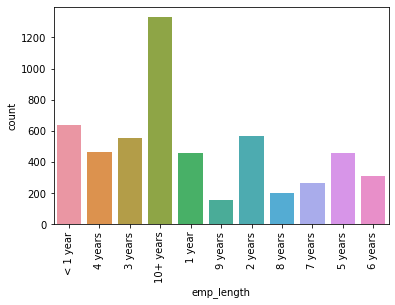

In [24]:
sns.countplot(x = 'emp_length',data = app_data3)
plt.xticks(rotation = 90)

As we can see the mode of the Original dataset and Charged off subset of the data is same i.e '10+ years' we can safely impute the data with 10+ years as this is the mode

In [25]:
#Replacing th null values with the identified mode
app_data2.emp_length.fillna('10+ years',inplace=True)

In [26]:
(round(app_data2.isnull().sum()/len(app_data2.index), 2)*100).sort_values(ascending=True)

id                            0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
initial_list_status           0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_d                  0.0
last_pymnt_amnt               0.0
last_credit_pull_d            0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
application_type              0.0
acc_now_delinq                0.0
chargeoff_within_12_mths      0.0
delinq_amnt                   0.0
open_acc                      0.0
pub_rec_bankruptcies          0.0
mths_since_last_delinq        0.0
earliest_cr_line              0.0
member_id                     0.0
loan_amnt     

In [27]:
app_data2.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_l

In [28]:
app_data2['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
24.40%      1
16.01%      1
22.64%      1
18.72%      1
18.36%      1
Name: int_rate, Length: 371, dtype: int64

In [29]:
app_data2['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [30]:
#function to convert int_rate to floa data type
app_data2.int_rate = app_data2.int_rate.apply(lambda x: 0 if x=="0" else float(x[0:-1]))

In [31]:
#Verify the dtype of app_data2.int_rate once again
app_data2.int_rate.dtype

dtype('float64')

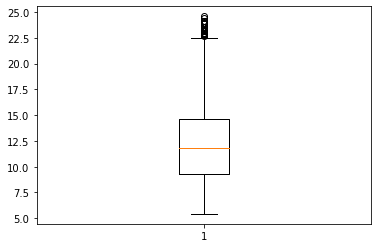

In [32]:
#Create a box plot for the int_rate column
plt.boxplot(app_data2.int_rate)
plt.show()

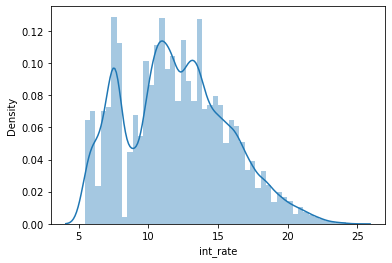

In [33]:
#Create a distribution plot for app_data2.int_rate
sns.distplot(app_data2.int_rate)
plt.show()

In [34]:
#Binning the below variables in a range

bins = [5,9.25, 12, 14.6, 25,100]

int_Range = ['0.00-5.00','5.00-9.25','9.25-11.86','11.86-14.59','14.59-Above']

app_data2['int_rate_Bins'] = pd.cut(app_data2['int_rate'], bins,labels=int_Range)

int_Range_Group = app_data2.groupby(pd.cut(app_data2.int_rate, bins))

display(int_Range_Group.int_rate.count())

int_rate
(5.0, 9.25]      10027
(9.25, 12.0]     10942
(12.0, 14.6]      8916
(14.6, 25.0]      9832
(25.0, 100.0]        0
Name: int_rate, dtype: int64

In [35]:
app_data2['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

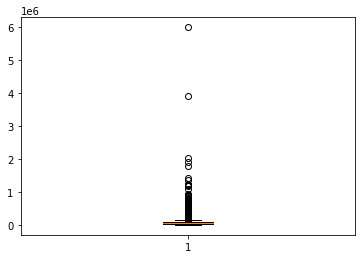

In [36]:
plt.boxplot(app_data2.annual_inc)
plt.show()

In [37]:
#Binning the below variables in a range

bins = [40000,60000,82300,200000,210000,1000000]

int_Range = ['0.00-40000.00','40000.00-60000.00','60000.00-82300.00','82300.00-200000.00','200000-Above']

app_data2['annual_inc_Bins'] = pd.cut(app_data2['annual_inc'], bins,labels=int_Range)

annual_inc_Group = app_data2.groupby(pd.cut(app_data2.annual_inc, bins))

display(annual_inc_Group.annual_inc.count())

annual_inc
(40000, 60000]       11608
(60000, 82300]        8303
(82300, 200000]       9343
(200000, 210000]        77
(210000, 1000000]      495
Name: annual_inc, dtype: int64

In [38]:
#Checking outliers - graphical representation of outliers
app_data2['collections_12_mths_ex_med'].value_counts() 

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [39]:
## Extract the month from the Issue Date
app_data2['issue_d'].value_counts() 

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [40]:
#Write the function to make the changes to date formate
app_data2['issue_d_2'] = app_data2.issue_d.apply(lambda x: x[0:4]+"20"+x[4:])

In [41]:
app_data2['issue_d_2'].value_counts() 

Dec-2011    2260
Nov-2011    2223
Oct-2011    2114
Sep-2011    2063
Aug-2011    1928
Jul-2011    1870
Jun-2011    1827
May-2011    1689
Apr-2011    1562
Mar-2011    1443
Jan-2011    1380
Feb-2011    1297
Dec-2010    1267
Oct-2010    1132
Nov-2010    1121
Jul-2010    1119
Sep-2010    1086
Aug-2010    1078
Jun-2010    1029
May-2010     920
Apr-2010     827
Mar-2010     737
Feb-2010     627
Nov-2009     602
Dec-2009     598
Jan-2010     589
Oct-2009     545
Sep-2009     449
Aug-2009     408
Jul-2009     374
Jun-2009     356
May-2009     319
Apr-2009     290
Mar-2009     276
Feb-2009     260
Jan-2009     239
Mar-2008     236
Dec-2008     223
Nov-2008     184
Feb-2008     174
Jan-2008     171
Apr-2008     155
Oct-2008      96
Dec-2007      85
Jul-2008      83
May-2008      71
Aug-2008      71
Jun-2008      66
Oct-2007      47
Nov-2007      37
Aug-2007      33
Sep-2008      32
Jul-2007      30
Sep-2007      18
Jun-2007       1
Name: issue_d_2, dtype: int64

In [42]:
# Updated Isusue Month : Converting it to correct format
app_data2['issue_d_updated'] = pd.to_datetime(app_data2['issue_d_2'], format='%b-%Y')

In [43]:
app_data2['issue_d_updated'].value_counts() 

2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
2011-07-01    1870
2011-06-01    1827
2011-05-01    1689
2011-04-01    1562
2011-03-01    1443
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

In [44]:
# Column with only Issue Month Number and Year Number for analyisis on sesanolity

app_data2['issue_d_month'] = pd.to_datetime(app_data2['issue_d_updated']).dt.month
app_data2['issue_d_year'] = pd.to_datetime(app_data2['issue_d_updated']).dt.year

In [45]:
app_data2['issue_d_month'].value_counts().sort_values(ascending=True)

2     2358
1     2379
3     2692
4     2834
5     2999
6     3279
7     3476
8     3518
9     3648
10    3934
11    4167
12    4433
Name: issue_d_month, dtype: int64

In [46]:
app_data2['earliest_cr_line'].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Dec-61      1
Jun-68      1
Oct-08      1
Feb-66      1
Nov-62      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [47]:
# Getting the correct date format from string
app_data2['earliest_cr_line_New'] = app_data2.earliest_cr_line.apply(lambda x: x[0:4]+"19"+x[4:] if int(x[4:])>20 else x[0:4]+"20"+x[4:])

In [48]:
# Updated Isusue Month : Converting it to correct format
app_data2['earliest_cr_line_New'] = pd.to_datetime(app_data2['earliest_cr_line_New'], format='%b-%Y')

In [49]:
app_data2['earliest_cr_line_New'].value_counts()

1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
1946-01-01      1
1961-11-01      1
1968-11-01      1
1959-06-01      1
1964-10-01      1
Name: earliest_cr_line_New, Length: 526, dtype: int64

In [50]:
# Derived columns for anlysis - Difference in Loan funded date and Earliest Credit Line Open date

app_data2['Derived_months'] = ((app_data2.issue_d_updated - app_data2.earliest_cr_line_New)/np.timedelta64(1, 'M'))

In [51]:
app_data2['Derived_months'].describe()

count    39717.000000
mean       165.492370
std         82.189137
min         35.976098
25%        109.998152
50%        150.968192
75%        204.981622
max        784.968891
Name: Derived_months, dtype: float64

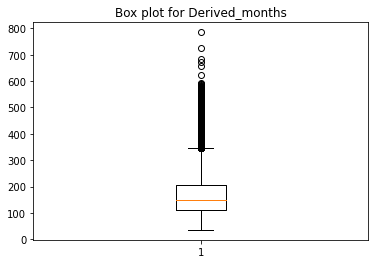

In [52]:
plt.boxplot(app_data2.Derived_months)
plt.title('Box plot for Derived_months')
plt.show()

In [53]:
# Binning for analysis purposes
bins = [35,110.00, 150.97,204.59,1000,2000]

int_Range = ['0.00-35.00','35.00-110.00','110.00-150.97','150.97-204.59','204.59-Above']

app_data2['Derived_months_Bins'] = pd.cut(app_data2['Derived_months'], bins,labels=int_Range)

Derived_months_Range_Group = app_data2.groupby(pd.cut(app_data2.Derived_months, bins))

display(Derived_months_Range_Group.Derived_months.count())

Derived_months
(35.0, 110.0]       10066
(110.0, 150.97]      9878
(150.97, 204.59]     9807
(204.59, 1000.0]     9966
(1000.0, 2000.0]        0
Name: Derived_months, dtype: int64

In [54]:
app_data2['dti'].describe()                  

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [55]:
#chargeoff_within_12_mths column don't have many values - all records are with 0 or NA values so we will ignore this column for analysis

app_data2['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [56]:
app_data2['pub_rec_bankruptcies'].value_counts().sort_values(ascending=True)

2.0        7
1.0     1674
0.0    38036
Name: pub_rec_bankruptcies, dtype: int64

In [57]:
# initial_list_status column is having only 'F' for all the rows  so this is not helpful for anlysis

app_data2['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [58]:
# Creating int column for target variable based on values from Loan Status which is our target variable
app_data2["Target"]= [1 if x == 'Charged Off' else 2 for x in app_data2['loan_status']] 
app_data2.head()

# 1 - Charged - Off , 2- Fully Pad + Current

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_Bins,annual_inc_Bins,issue_d_2,issue_d_updated,issue_d_month,issue_d_year,earliest_cr_line_New,Derived_months,Derived_months_Bins,Target
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,34.0,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,5.00-9.25,NaN,Dec-2011,2011-12-01,12,2011,1985-01-01,322.963511,150.97-204.59,2
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,34.0,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11.86-14.59,NaN,Dec-2011,2011-12-01,12,2011,1999-04-01,152.019549,110.00-150.97,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,34.0,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11.86-14.59,NaN,Dec-2011,2011-12-01,12,2011,2001-11-01,120.971683,35.00-110.00,2
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,9.25-11.86,0.00-40000.00,Dec-2011,2011-12-01,12,2011,1996-02-01,189.966940,110.00-150.97,2
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,9.25-11.86,40000.00-60000.00,Dec-2011,2011-12-01,12,2011,1996-01-01,190.985441,110.00-150.97,2


Text(0.5, 1.0, 'Loans by Loan_Status - 1. Charged-Off, 2- Fully Paid + Current')

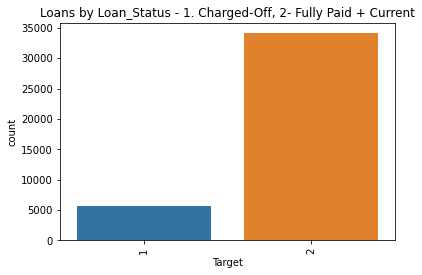

In [59]:
sns.countplot(x = 'Target',data = app_data2)
plt.xticks(rotation = 90)
plt.title("Loans by Loan_Status - 1. Charged-Off, 2- Fully Paid + Current")


In [60]:
app_data2['title'].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
Pay CC Debt Down to Own a Harley       1
Consolidate small debts                1
Buying equipment for client            1
SophieLoan                             1
Best Loan                              1
Name: title, Length: 19615, dtype: int64

In [61]:
# Droping url,title columns

app_data2.drop('url',  axis='columns', inplace=True)
app_data2.drop('title',  axis='columns', inplace=True)

In [62]:
print(app_data2.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq           95
open_acc                         40
pub_rec                           5
revol_bal                   

In [63]:
# Creating two datasets 1) Charged-off users 2) Fully Paid users

Charged_Off = app_data2.loc[app_data2['Target'] == 1]
Fully_Paid_Current = app_data2.loc[app_data2['Target'] == 2]

# Univariate Analysis

In [64]:
# Function for bar plotting

def pieplotting(train, column):
    train = train
    col = column    
    train[col].value_counts().plot.pie()
    plt.title('Charged-Off Loans Count by '+ col)
    plt.show()


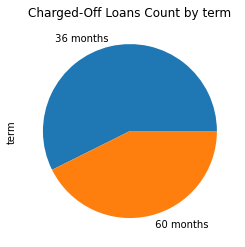

----------------------------------------------------------------------------------------------


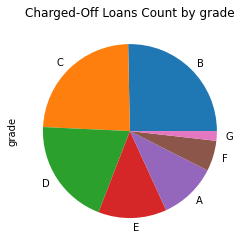

----------------------------------------------------------------------------------------------


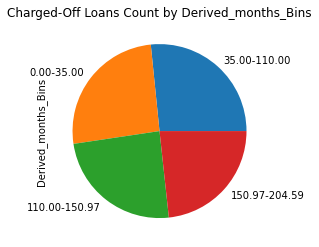

----------------------------------------------------------------------------------------------


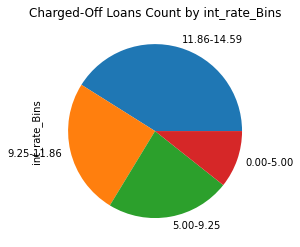

----------------------------------------------------------------------------------------------


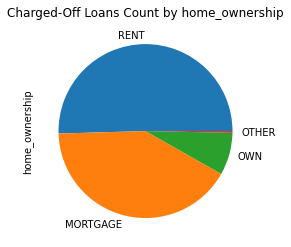

----------------------------------------------------------------------------------------------


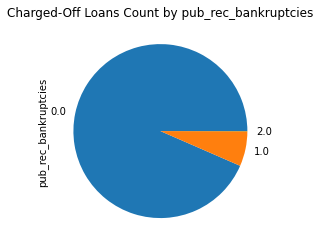

----------------------------------------------------------------------------------------------


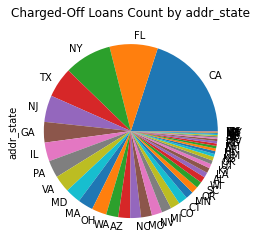

----------------------------------------------------------------------------------------------


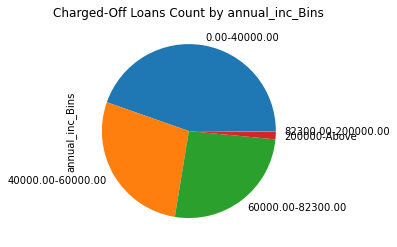

----------------------------------------------------------------------------------------------


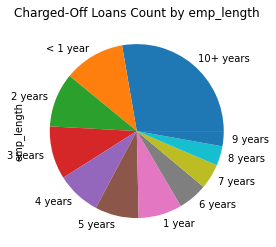

----------------------------------------------------------------------------------------------


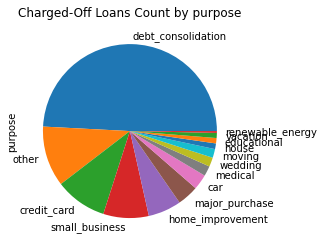

----------------------------------------------------------------------------------------------


In [65]:
# Bar plots for Univariate analysis

for column in ['term','grade','Derived_months_Bins','int_rate_Bins','home_ownership','pub_rec_bankruptcies','addr_state','annual_inc_Bins','emp_length','purpose']:
    pieplotting( Charged_Off, column)
    print('----------------------------------------------------------------------------------------------')

In [66]:
def barplotting(train, column):
    train = train
    col = column    
    train[col].value_counts().plot.bar()
    plt.title('Charged-Off Loans Count by '+ col)
    plt.show()

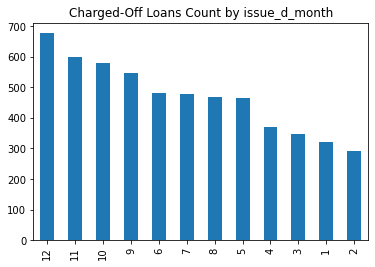

In [67]:
barplotting( Charged_Off, 'issue_d_month')

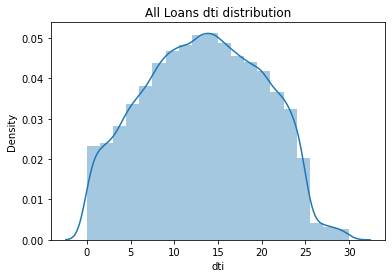

In [68]:
sns.distplot(app_data2.dti, bins=20)
plt.title('All Loans dti distribution')
plt.show()

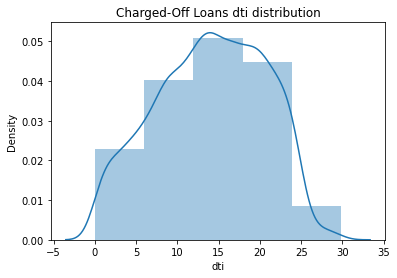

In [69]:
# Charged-off users dti distribution

sns.distplot(Charged_Off.dti, bins=5)
plt.title('Charged-Off Loans dti distribution')
plt.show()

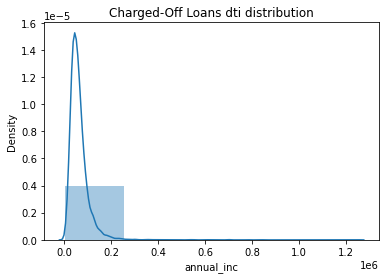

In [70]:
sns.distplot(Charged_Off.annual_inc, bins=5)
plt.title('Charged-Off Loans dti distribution')
plt.show()

## Insights:

1) 36 Month Loan term Loans getting Charged-off more compared to 60 Months Loans

2) Nearly 70% of Charged off Loans are from Grade B, C and D

3) Loans authorized towards end of year are getting charged-off more

4) More loans are getting charged-off from the states – CA and FL

5) 40% of the changed-off loans are from the users with less than 40,000 Annual salary 

6) 50% of the Loans are from the user’s home ownership is Rent

7) More change-off are observed in Loans sanctioned with high interest rate

8) 50% of Charged-off Loans are with purpose debt consolidation


In [71]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=Charged_Off,index="home_ownership",columns="annual_inc_Bins",values="Target",aggfunc=np.sum)

In [72]:
res

annual_inc_Bins,0.00-40000.00,40000.00-60000.00,60000.00-82300.00,82300.00-200000.00,200000-Above
home_ownership,,,,,
MORTGAGE,696,574,647,3,33
OTHER,4,5,3,0,0
OWN,128,60,56,0,3
RENT,901,438,304,2,18


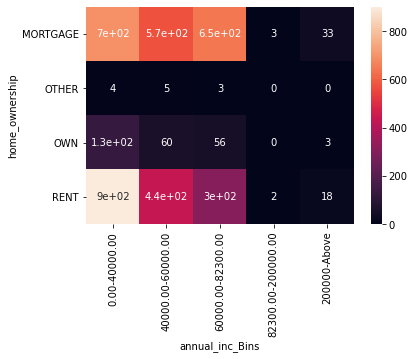

In [73]:
sns.heatmap(res,annot=True)
plt.show()

## Insights:

1) Loans sentioned to users with high Salary and staying in Own house changes of getting Default is very less 

In [74]:
def plotting2(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(30,10))

    ax = plt.subplot(223)
    df = pd.DataFrame()
    #df['1']= (train_0[col].value_counts())
    #df['2']= (train_1[col].value_counts())
    df['1']= ((train_0[col].value_counts())/(train_0[col].value_counts() + train_1[col].value_counts() ))
    df['2']= ((train_1[col].value_counts())/(train_0[col].value_counts() + train_1[col].value_counts() ))
 

    ax.bar(df.index, df['1'], label='Charged-Off')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
    ax.bar(df.index, df['2'], bottom=df['1'],
       label='Fully Paid + Current')
    plt.title('Loans count by Loan Status and '+ col)


    plt.tight_layout()

    plt.show()
      

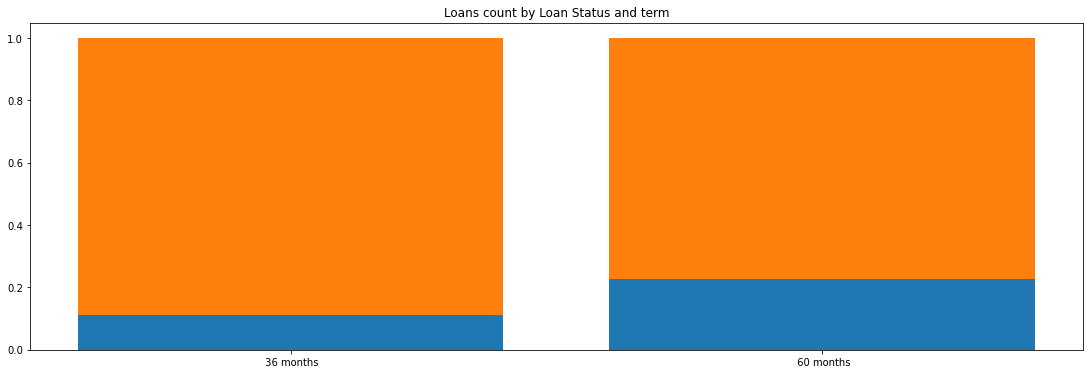

----------------------------------------------------------------------------------------------


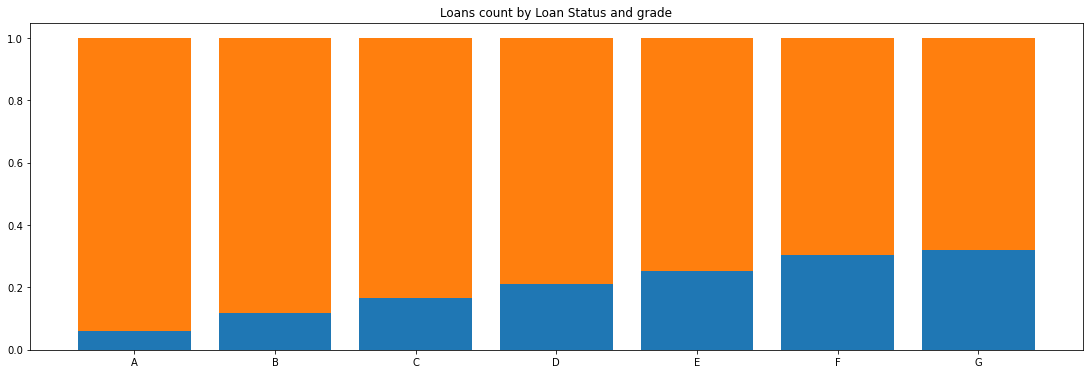

----------------------------------------------------------------------------------------------


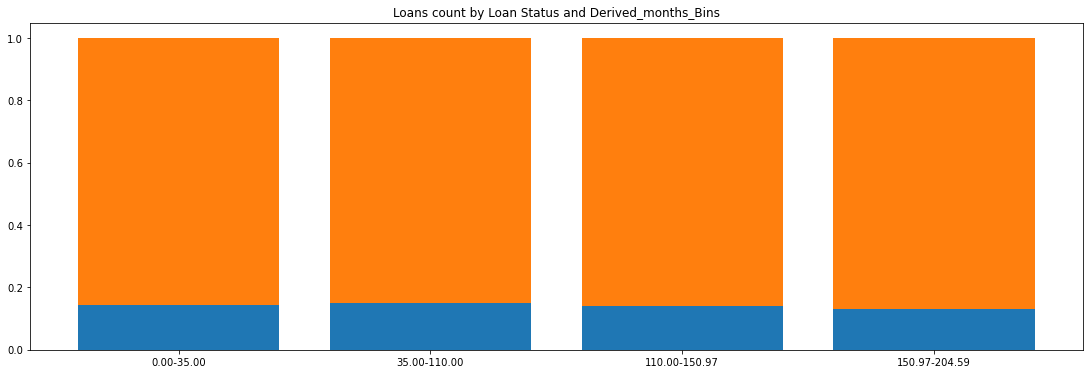

----------------------------------------------------------------------------------------------


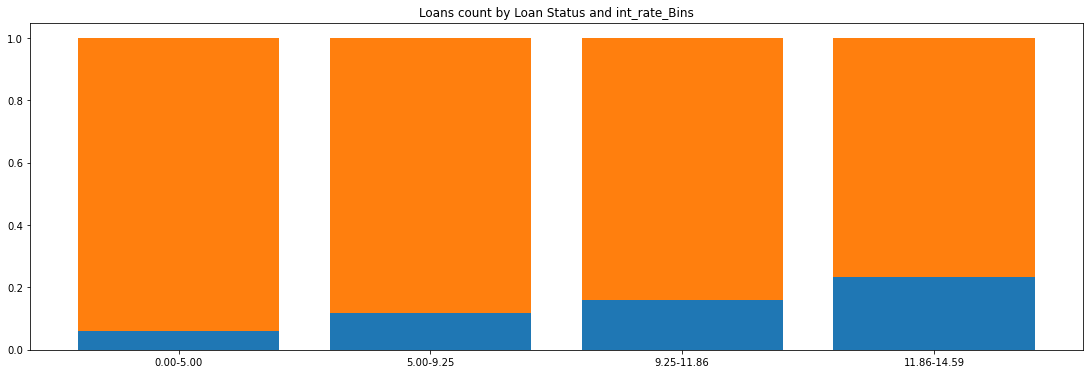

----------------------------------------------------------------------------------------------


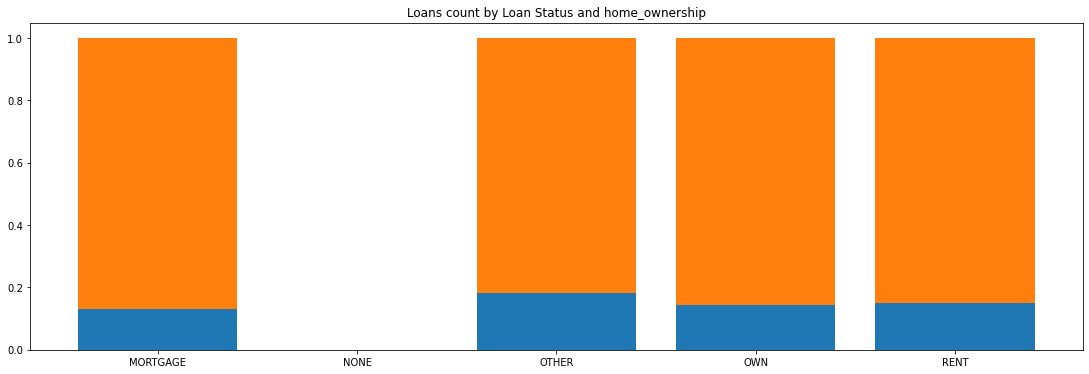

----------------------------------------------------------------------------------------------


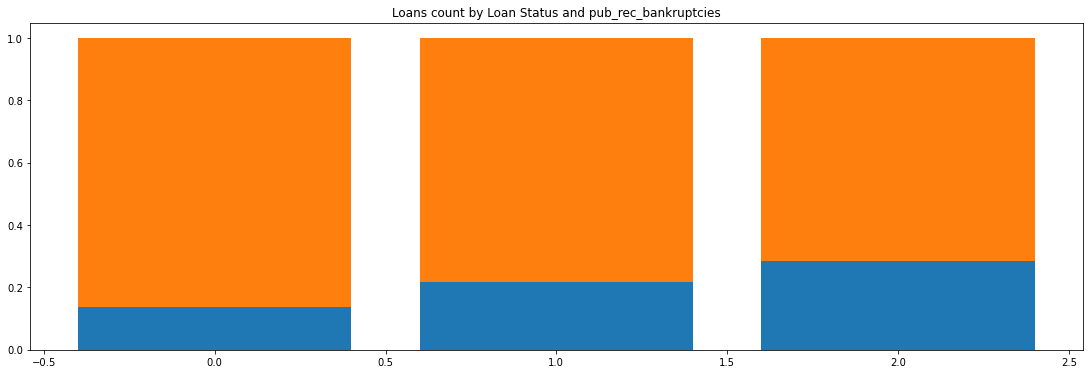

----------------------------------------------------------------------------------------------


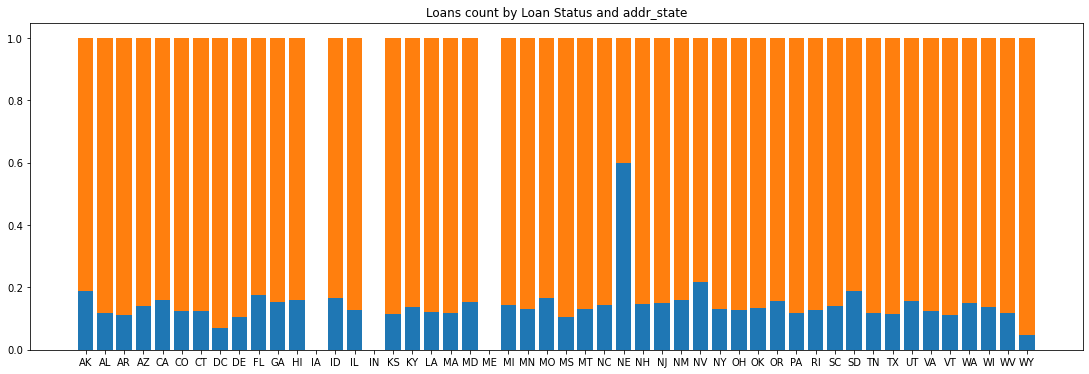

----------------------------------------------------------------------------------------------


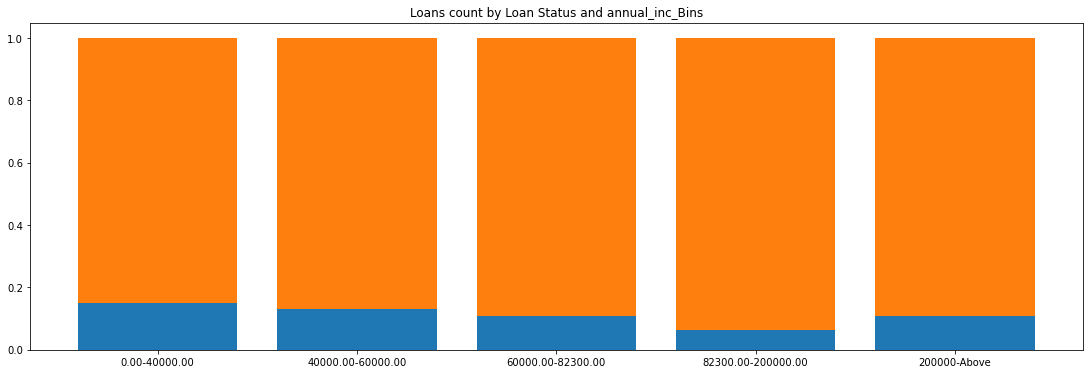

----------------------------------------------------------------------------------------------


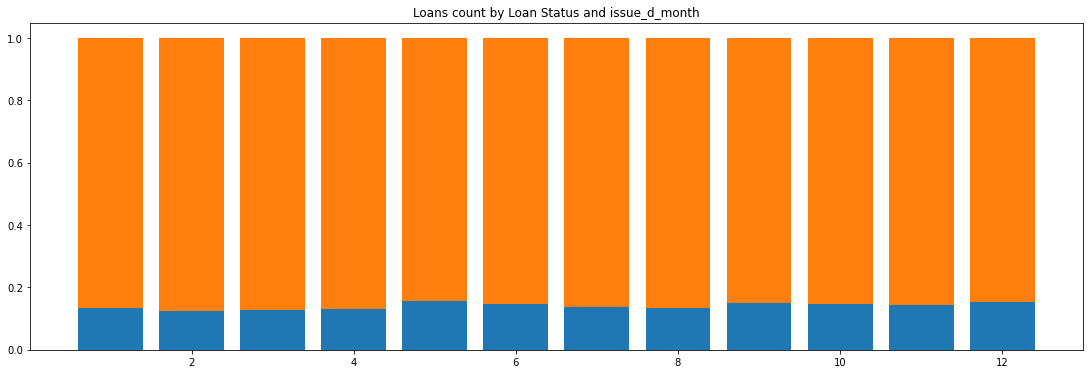

----------------------------------------------------------------------------------------------


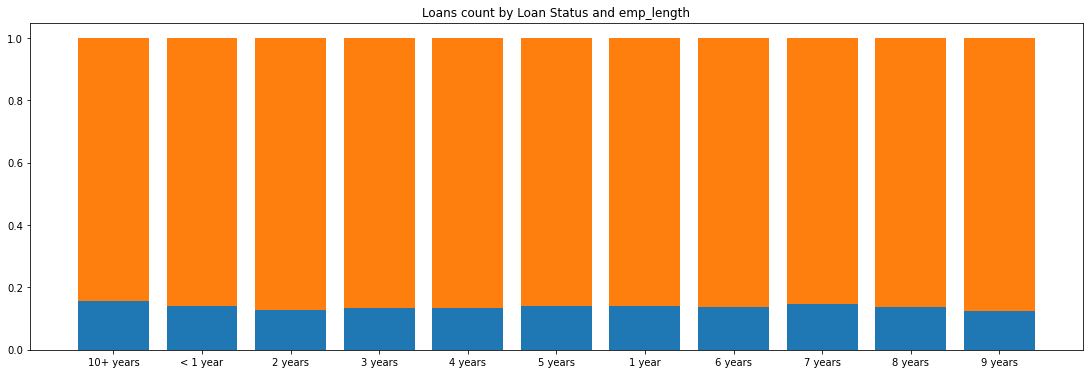

----------------------------------------------------------------------------------------------


In [75]:
## Comparison of Changed-off users and Full Paid + Current users

for column in ['term','grade','Derived_months_Bins','int_rate_Bins','home_ownership','pub_rec_bankruptcies','addr_state','annual_inc_Bins','issue_d_month','emp_length']:
    plotting2(app_data2,Charged_Off,Fully_Paid_Current, column)
    print('----------------------------------------------------------------------------------------------')

In [76]:
def plotting_Actuals(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(20,10))

    ax = plt.subplot(223)
    df = pd.DataFrame()
    df['1']= (train_0[col].value_counts())
    df['2']= (train_1[col].value_counts())
 

    ax.bar(df.index, df['1'], label='Charged-Off')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
    ax.bar(df.index, df['2'], bottom=df['1'],
       label='Fully Paid + Current')
    plt.title('Loans count by Loan Status and '+ col)
    plt.legend()
    plt.tight_layout()
    plt.show()
      

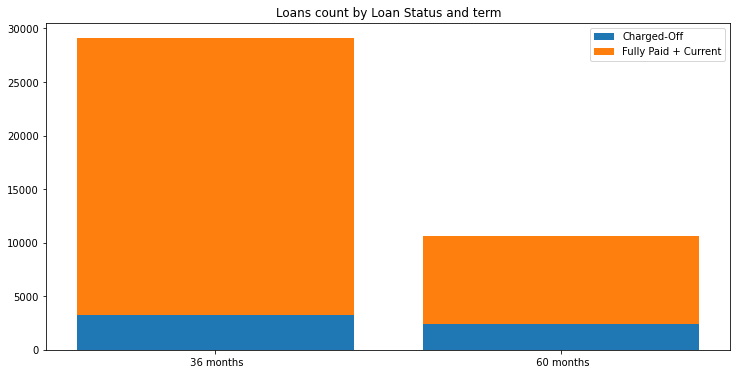

----------------------------------------------------------------------------------------------


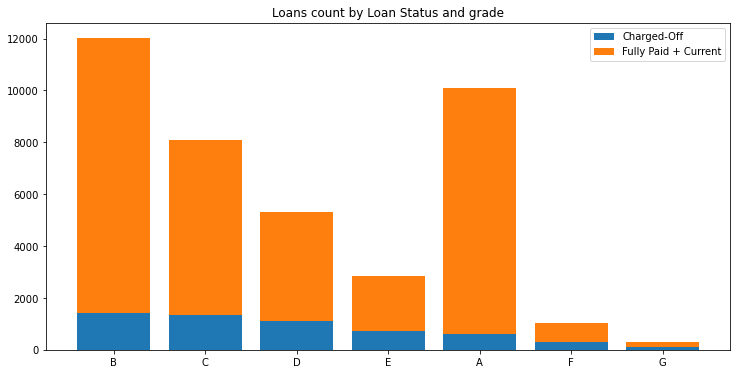

----------------------------------------------------------------------------------------------


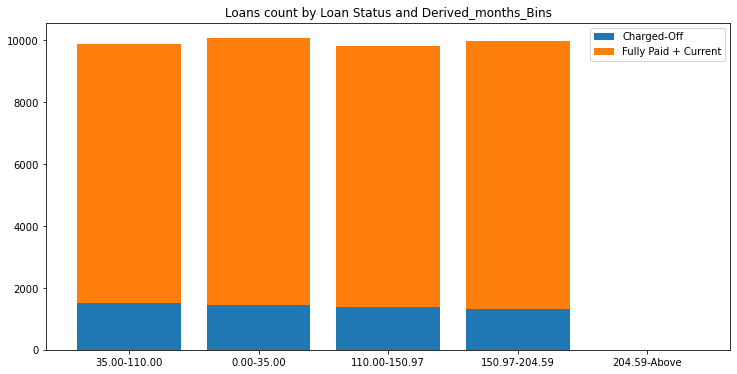

----------------------------------------------------------------------------------------------


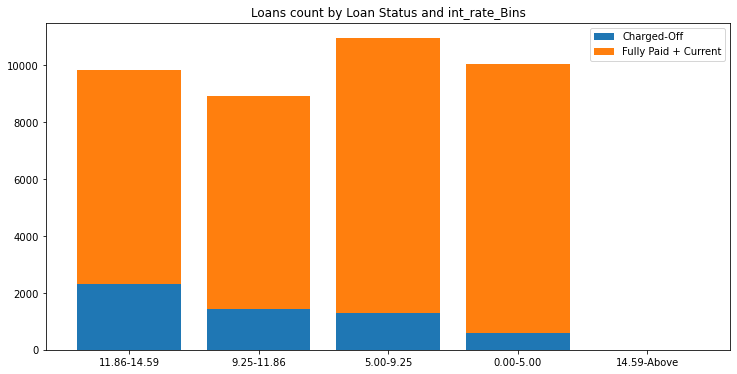

----------------------------------------------------------------------------------------------


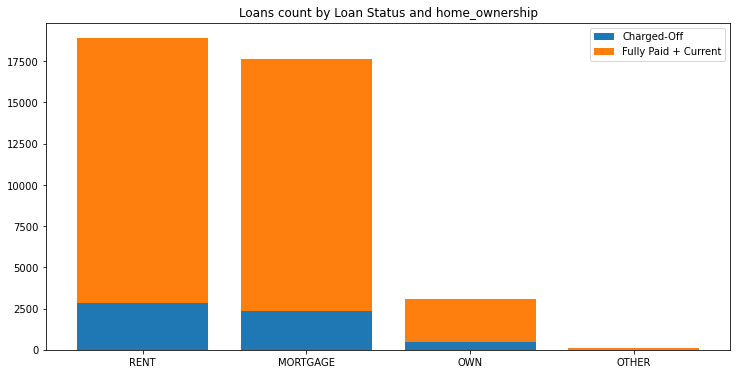

----------------------------------------------------------------------------------------------


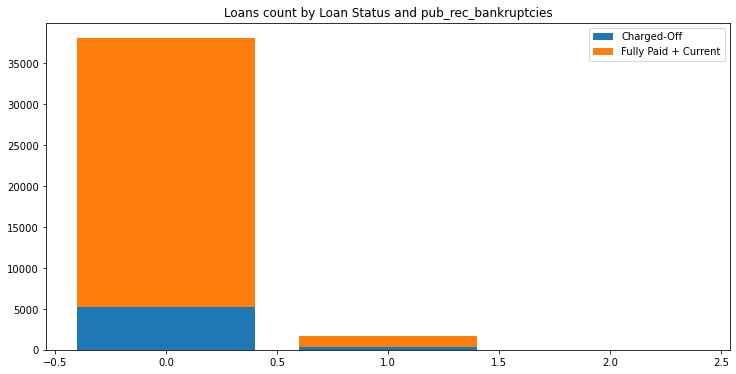

----------------------------------------------------------------------------------------------


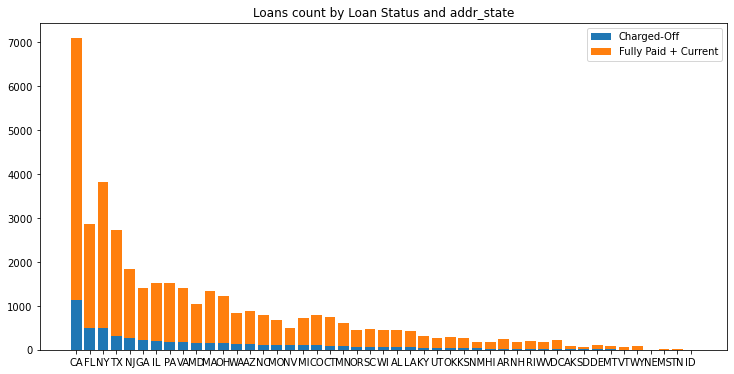

----------------------------------------------------------------------------------------------


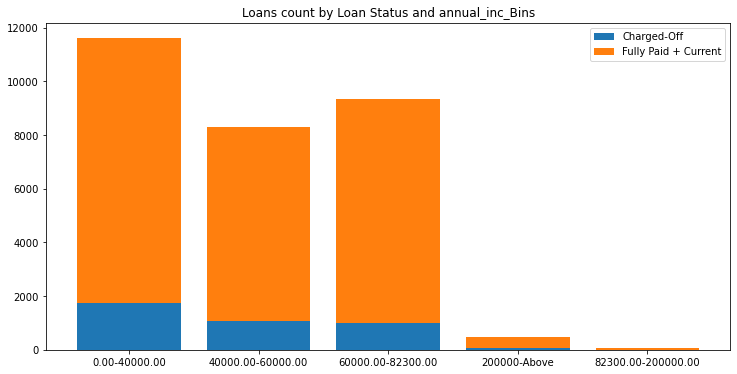

----------------------------------------------------------------------------------------------


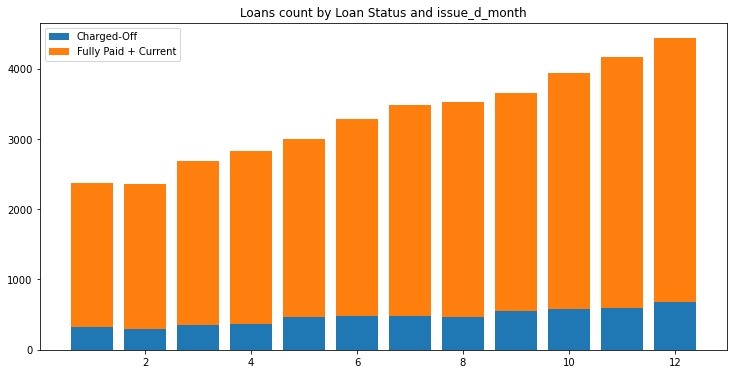

----------------------------------------------------------------------------------------------


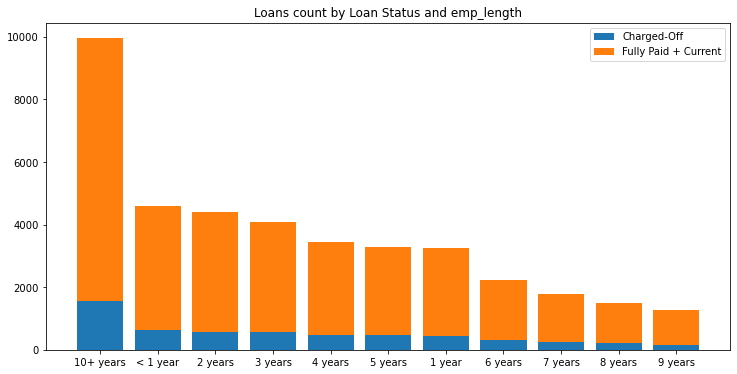

----------------------------------------------------------------------------------------------


In [77]:
## Comparison of Changed-off users and Full Paid + Current users

for column in ['term','grade','Derived_months_Bins','int_rate_Bins','home_ownership','pub_rec_bankruptcies','addr_state','annual_inc_Bins','issue_d_month','emp_length']:
    plotting_Actuals(app_data2,Charged_Off,Fully_Paid_Current, column)
    print('----------------------------------------------------------------------------------------------')

In [78]:
res = pd.pivot_table(data=app_data2,index="addr_state",columns="loan_status",values="id",aggfunc= lambda x: len(x),fill_value=0)

In [79]:
res['Total']= res['Charged Off']+res['Current']+res['Fully Paid']
res['Charged-Off Loans %'] = round(res['Charged Off']*100/res['Total'],0)

In [80]:
res.sort_values(by='Charged-Off Loans %', ascending=False)

loan_status,Charged Off,Current,Fully Paid,Total,Charged-Off Loans %
addr_state,,,,,
NE,3,0,2,5,60.0
NV,108,18,371,497,22.0
AK,15,2,63,80,19.0
SD,12,2,50,64,19.0
FL,504,85,2277,2866,18.0
MO,114,16,556,686,17.0
ID,1,0,5,6,17.0
CA,1125,150,5824,7099,16.0
UT,40,6,212,258,16.0


In [81]:
# Analysis 

pub_rec_bankruptcies = app_data2.pivot_table(index='pub_rec_bankruptcies', columns='loan_status',
                              values='id', aggfunc=len).reset_index()
pub_rec_bankruptcies['Total']= pub_rec_bankruptcies['Charged Off']+pub_rec_bankruptcies['Current']+pub_rec_bankruptcies['Fully Paid']
pub_rec_bankruptcies['Charged-Off Loans %'] = round(pub_rec_bankruptcies['Charged Off']*100/pub_rec_bankruptcies['Total'],0)
pub_rec_bankruptcies.sort_values(by='Charged-Off Loans %', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Charged-Off Loans %
2,2.0,2,2,3,7,29.0
1,1.0,366,37,1271,1674,22.0
0,0.0,5259,1101,31676,38036,14.0


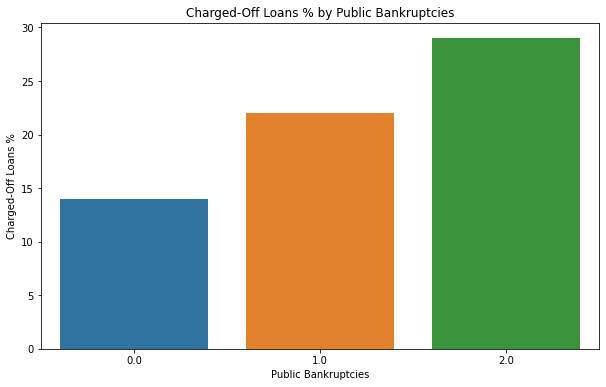

In [82]:

plt.figure(figsize=[10,6])
ax = sns.barplot(pub_rec_bankruptcies['pub_rec_bankruptcies'], pub_rec_bankruptcies['Charged-Off Loans %'], data=pub_rec_bankruptcies)
ax.set(xlabel='Public Bankruptcies', ylabel='Charged-Off Loans %', title="Charged-Off Loans % by Public Bankruptcies")
plt.show()

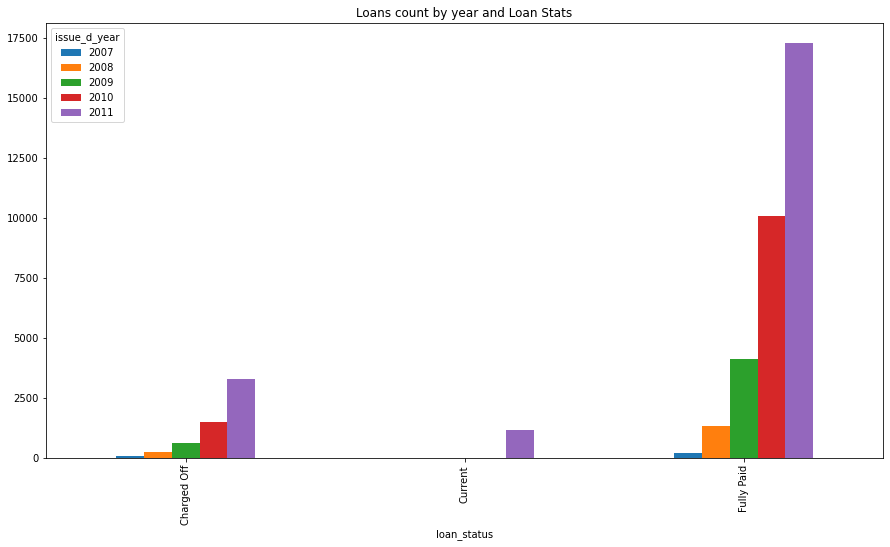

In [83]:
# Analysis on loans issued year wise
app_data2.groupby('loan_status')['issue_d_year'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.title("Loans count by year and Loan Stats")
plt.show()

## Insights:

1) More Loans are authorized for users staying rent home and also from users in CA state

2) In NE state, 60% Loans are getting changed-off (Out of total Authorized) but toal Loans Authorized in NE state are only 5

3) SD, AK and NV states are having ~20% of Charge-offs (Out of total Authorized).

4) Users with histroy of Public Bankruptcies getting charged-off more

5) Chagre-off loans are increasing year over year

<Figure size 432x720 with 0 Axes>

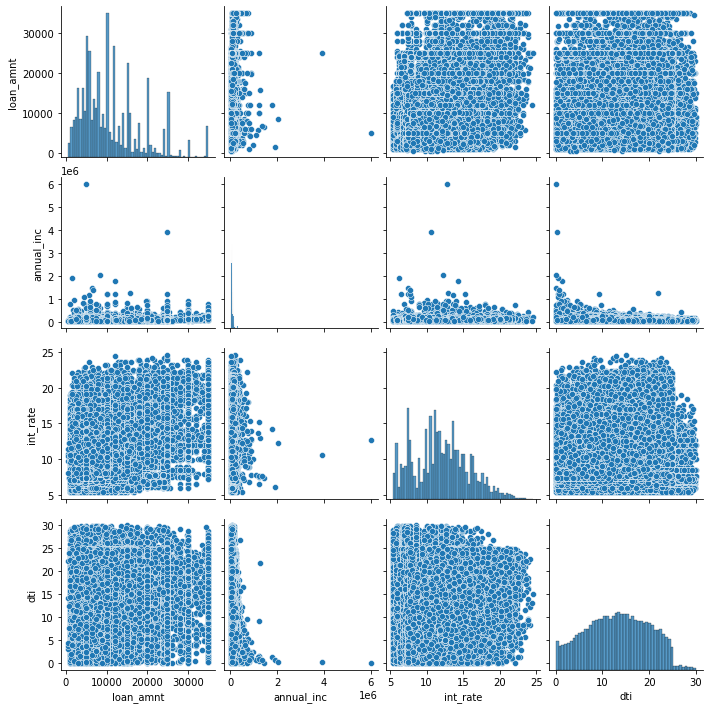

In [84]:
# Paid plot to identify the correlation betwen different attributes 

plt.figure(figsize=(6,10))
sns.pairplot(app_data2[['loan_amnt', 'annual_inc', 'int_rate', 'dti']])
plt.show()

Users with high salary applied for hign Loan amount